<h1> Diabetes prediction with Logistlc regression</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd. read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.shape

(768, 9)

**Data cleaning**

In [9]:
df["SkinThickness"] =df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


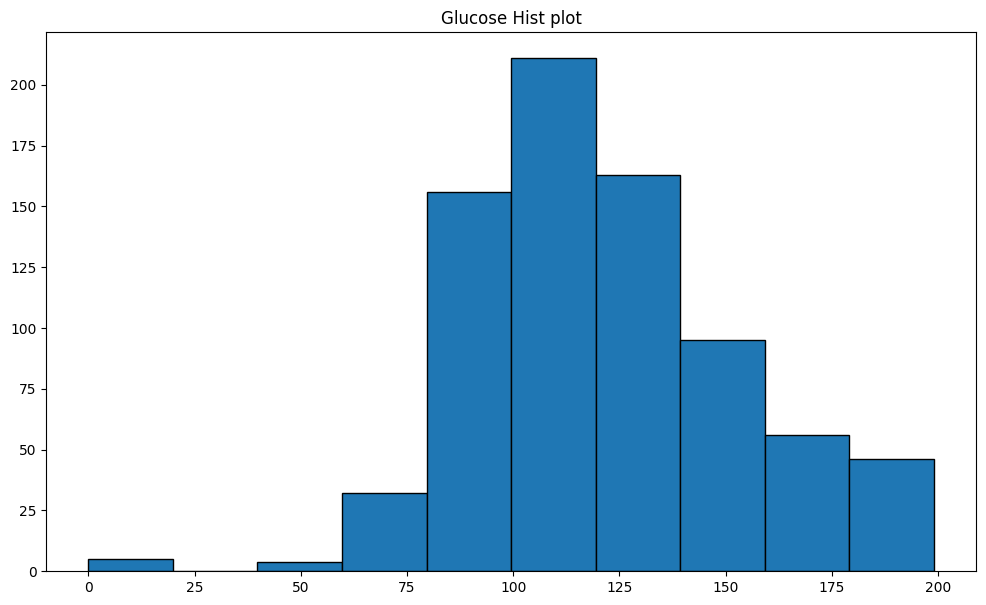

In [11]:
plt.figure(figsize = (12,7))
plt.hist("Glucose",  data = df, edgecolor ="k")
plt.title("Glucose Hist plot")
plt.show()

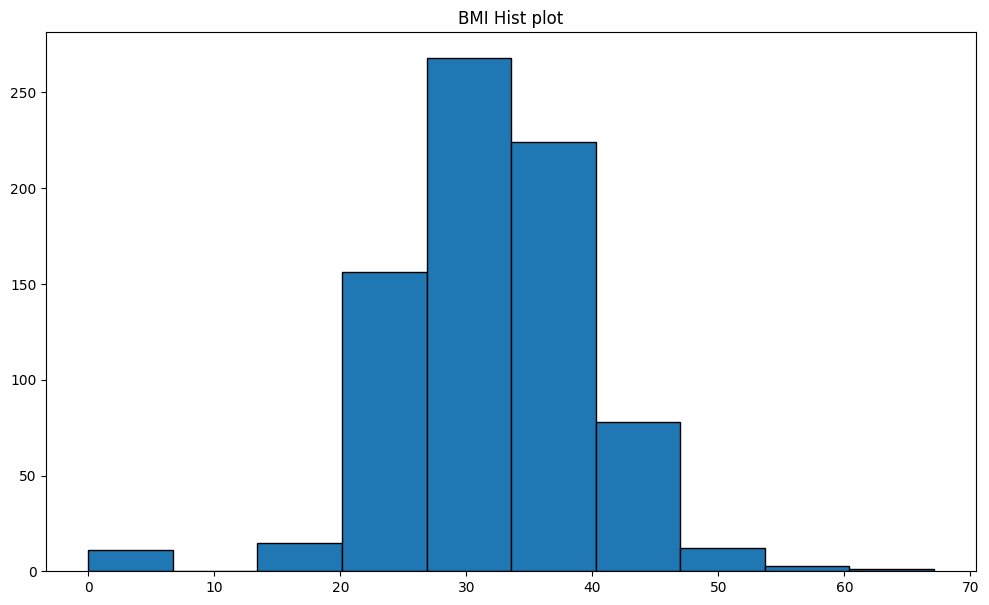

In [12]:
plt.figure(figsize = (12,7))
plt.hist("BMI",  data = df, edgecolor ="k")
plt.title("BMI Hist plot")
plt.show()

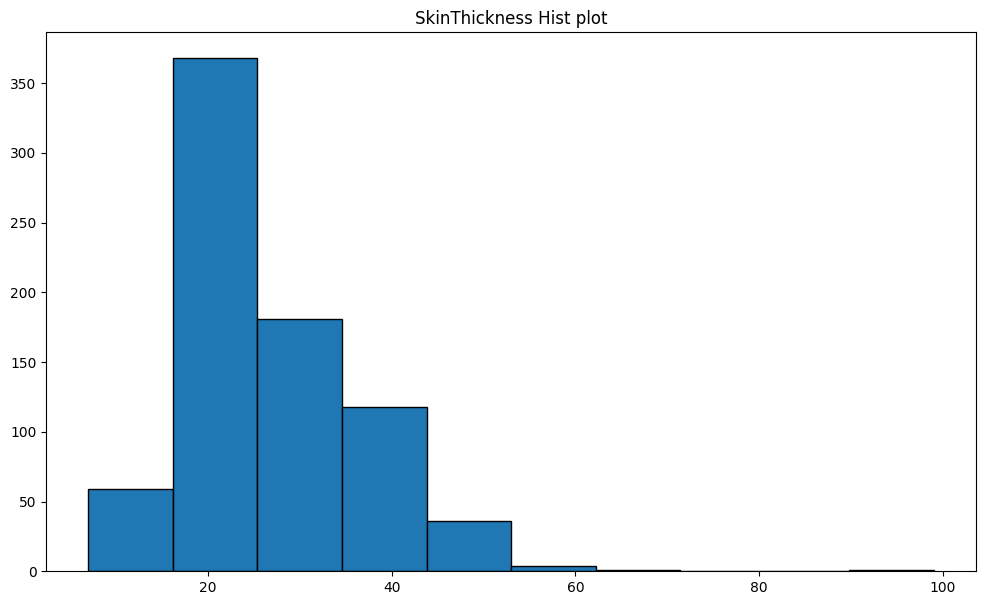

In [13]:
plt.figure(figsize = (12,7))
plt.hist("SkinThickness",  data = df, edgecolor ="k")
plt.title("SkinThickness Hist plot")
plt.show()

<h1>Outlier Removal</h1>

In [14]:
def remove_outlier(dataFrame):
    for column_name in dataFrame.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1- 1.5*IQR
        upper_limit= Q3 +1.5*IQR
        print(f"{column_name} >>Lower Limit: {lower_limit}\n upper Limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[column_name]> lower_limit)|(dataFrame[column_name]< upper_limit)]
        
        
    return dataFrame                                 

In [15]:
df = remove_outlier(df)


Pregnancies >>Lower Limit: -6.5
 upper Limit: 13.5
Glucose >>Lower Limit: 37.125
 upper Limit: 202.125
BloodPressure >>Lower Limit: 35.0
 upper Limit: 107.0
SkinThickness >>Lower Limit: 3.341145833333332
 upper Limit: 49.1953125
Insulin >>Lower Limit: -190.875
 upper Limit: 318.125
BMI >>Lower Limit: 13.35
 upper Limit: 50.550000000000004
DiabetesPedigreeFunction >>Lower Limit: -0.32999999999999996
 upper Limit: 1.2
Age >>Lower Limit: -1.5
 upper Limit: 66.5
Outcome >>Lower Limit: -1.5
 upper Limit: 2.5


In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [17]:
df.shape

(768, 9)

<h1>Data splitting</h1>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [20]:
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size =0.8, random_state = 42)

In [21]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,0,0.0,0.304,21
618,9,112,82,24.000000,0,28.2,1.282,50
346,1,139,46,19.000000,83,28.7,0.654,22
294,0,161,50,20.536458,0,21.9,0.254,65
231,6,134,80,37.000000,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140,28.6,0.411,26
106,1,96,122,20.536458,0,22.4,0.207,27
270,10,101,86,37.000000,0,45.6,1.136,38
435,0,141,0,20.536458,0,42.4,0.205,29


In [22]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [23]:
x_train.shape

(614, 8)

In [24]:
x_test.shape

(154, 8)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logReg = LogisticRegression()

In [27]:
logReg.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
logReg.score(x_test, y_test)

0.7792207792207793

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
predictions = logReg.predict(x_test)

In [31]:
cm = confusion_matrix(y_test,predictions)

In [32]:
cm

array([[83, 16],
       [18, 37]])

<Axes: >

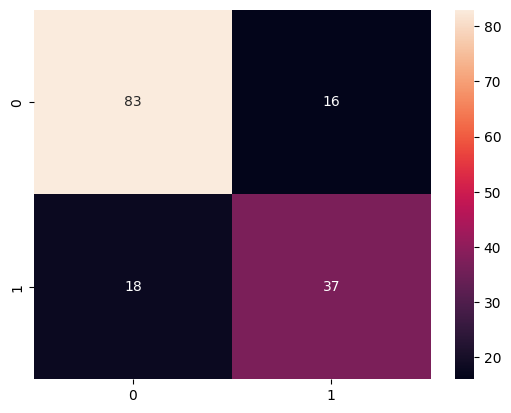

In [33]:
sns.heatmap(cm, annot = True)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

